In [1]:
import pandas as pd

matches = pd.read_csv("matches_2classes.csv", index_col=0)
#matches.head()

In [2]:
predictors = ["venue_code", "opp_code", "hour", "day_code"]

train = matches[matches["date"] < '2024-01-01']
test = matches[matches["date"] > '2024-01-01']

In [3]:
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                            )

In [4]:
dt = DecisionTreeClassifier(**{'criterion': 'gini', 
                               'max_depth': 18})

rf = RandomForestClassifier(**{'max_depth': 11, 'max_features': 11, 
                               'min_samples_leaf': 2, 'min_samples_split': 15, 
                               'n_estimators': 252, 'random_state': 4})

svc = SVC(**{'C': 0.6870174945459728, 
             'gamma': 71.31358082166152, 
             'kernel': 'rbf', 
             'random_state': 4})

lr = LogisticRegression(**{'class_weight': {0: 1, 1: 1}, 
                           'max_iter': 1000, 
                           'penalty': 'l2', 
                           'random_state': 2, 
                           'solver': 'liblinear'}
                       )

knn = KNeighborsClassifier(**{'n_neighbors': 20})

xgb = GradientBoostingClassifier(**{'learning_rate': 0.1, 
                                    'max_depth': 7, 'max_features': 4, 
                                    'min_samples_leaf': 5, 'min_samples_split': 75, 
                                    'n_estimators': 179, 
                                    'random_state': 3, 
                                    'subsample': 0.7})

cb = CatBoostClassifier(**{'depth': 4, 
                           'learning_rate': 0.04529332651885841, 
                           'n_estimators': 253, 
                           'random_state': 2, 
                           'verbose': 1})



In [5]:
models = [dt, rf, svc, lr, knn, xgb, cb]
models_name = ['dt', 'rf', 'svc', 'lr', 'knn', 'xgb', 'cb']

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [7]:
matches_scaled = matches.copy()
matches_scaled[predictors] = preprocessing.scale(matches_scaled[predictors]) 

train_scaled = matches_scaled[matches_scaled["date"] < '2024-01-01']
test_scaled = matches_scaled[matches_scaled["date"] > '2024-01-01']

In [8]:
def evaluation_(models):
    accuracy = []
    precision = []
    recall = []
    f1score = []
    for model in models:
        if model in [svc, lr, knn]:          
            model.fit(train_scaled[predictors], train_scaled['target'])
            preds = model.predict(test_scaled[predictors])
            accuracy.append(accuracy_score(test_scaled["target"], preds))
            precision.append(precision_score(test_scaled["target"], preds))
            recall.append(recall_score(test_scaled["target"], preds))
            f1score.append(f1_score(test_scaled["target"], preds))
            
            continue
        else:
            model.fit(train[predictors], train['target'])
            preds = model.predict(test[predictors])
            accuracy.append(accuracy_score(test["target"], preds))
            precision.append(precision_score(test["target"], preds))
            recall.append(recall_score(test["target"], preds))
            f1score.append(f1_score(test["target"], preds))
    return accuracy, precision, recall, f1score
        
accuracy, precision, recall, f1score = evaluation_(models)

0:	learn: 0.6901656	total: 290ms	remaining: 1m 13s
1:	learn: 0.6854191	total: 291ms	remaining: 36.5s
2:	learn: 0.6817516	total: 292ms	remaining: 24.3s
3:	learn: 0.6781720	total: 292ms	remaining: 18.2s
4:	learn: 0.6756972	total: 293ms	remaining: 14.5s
5:	learn: 0.6715600	total: 294ms	remaining: 12.1s
6:	learn: 0.6685850	total: 295ms	remaining: 10.4s
7:	learn: 0.6668711	total: 296ms	remaining: 9.05s
8:	learn: 0.6646704	total: 296ms	remaining: 8.04s
9:	learn: 0.6626761	total: 297ms	remaining: 7.22s
10:	learn: 0.6602338	total: 298ms	remaining: 6.56s
11:	learn: 0.6580881	total: 299ms	remaining: 6s
12:	learn: 0.6574618	total: 300ms	remaining: 5.53s
13:	learn: 0.6543188	total: 301ms	remaining: 5.13s
14:	learn: 0.6530882	total: 301ms	remaining: 4.78s
15:	learn: 0.6518429	total: 302ms	remaining: 4.47s
16:	learn: 0.6507198	total: 303ms	remaining: 4.21s
17:	learn: 0.6499536	total: 304ms	remaining: 3.97s
18:	learn: 0.6473214	total: 305ms	remaining: 3.75s
19:	learn: 0.6449282	total: 305ms	remaining

181:	learn: 0.5381743	total: 489ms	remaining: 191ms
182:	learn: 0.5379403	total: 490ms	remaining: 187ms
183:	learn: 0.5373897	total: 491ms	remaining: 184ms
184:	learn: 0.5362640	total: 492ms	remaining: 181ms
185:	learn: 0.5359779	total: 493ms	remaining: 177ms
186:	learn: 0.5354332	total: 493ms	remaining: 174ms
187:	learn: 0.5350237	total: 494ms	remaining: 171ms
188:	learn: 0.5345368	total: 495ms	remaining: 168ms
189:	learn: 0.5340690	total: 496ms	remaining: 164ms
190:	learn: 0.5328772	total: 497ms	remaining: 161ms
191:	learn: 0.5324551	total: 497ms	remaining: 158ms
192:	learn: 0.5316188	total: 498ms	remaining: 155ms
193:	learn: 0.5310803	total: 499ms	remaining: 152ms
194:	learn: 0.5301531	total: 500ms	remaining: 149ms
195:	learn: 0.5297845	total: 501ms	remaining: 146ms
196:	learn: 0.5292792	total: 502ms	remaining: 143ms
197:	learn: 0.5287915	total: 503ms	remaining: 140ms
198:	learn: 0.5282572	total: 504ms	remaining: 137ms
199:	learn: 0.5279072	total: 504ms	remaining: 134ms
200:	learn: 

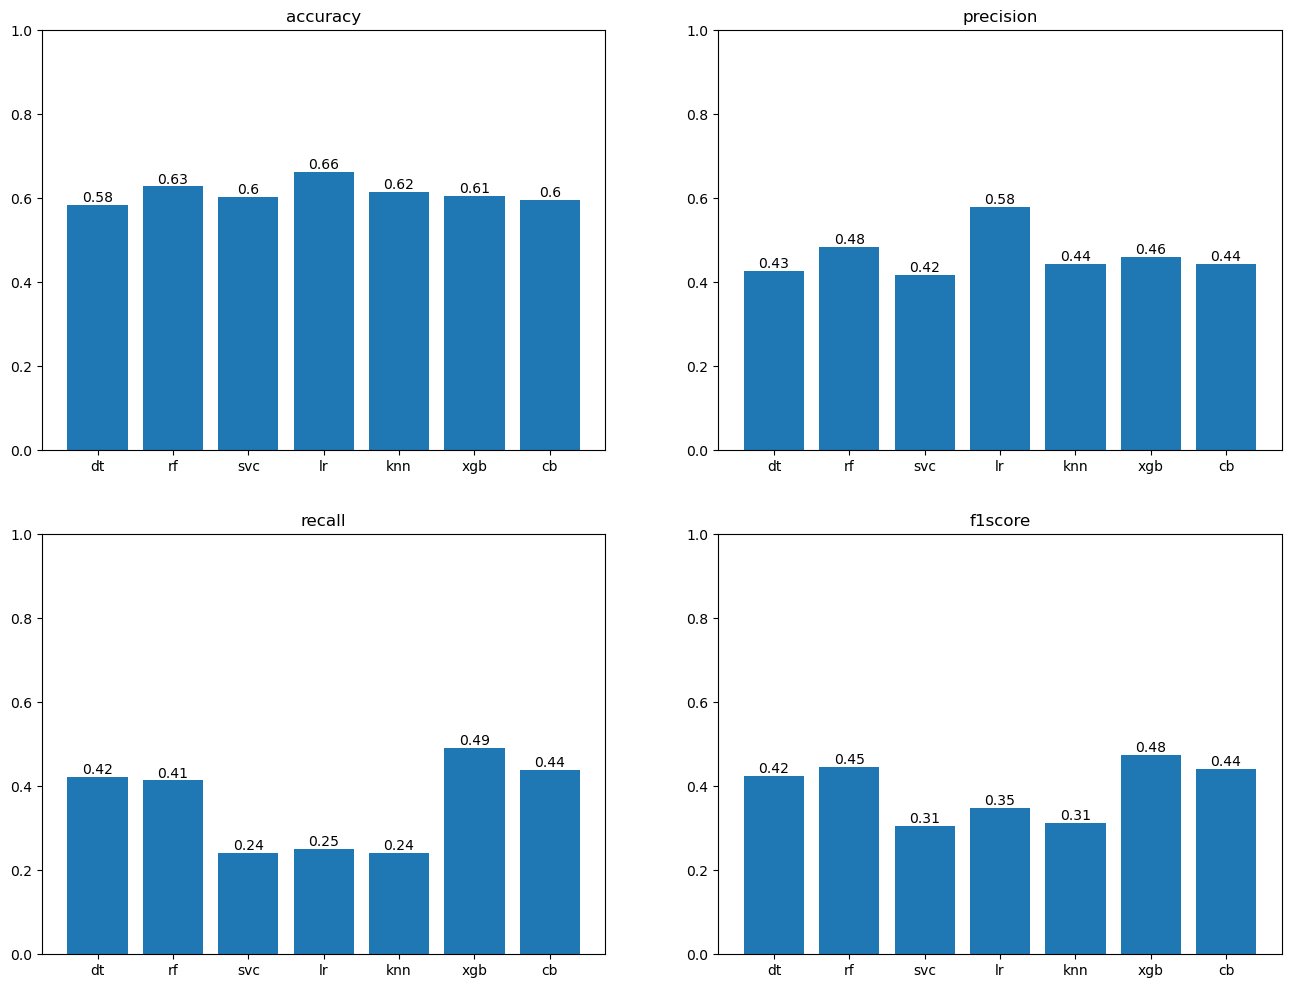

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

ax = ax.flatten()

score = [accuracy, precision, recall, f1score]
score_name = ['accuracy', 'precision', 'recall', 'f1score']

for i in range(len(ax)):
    ax[i].bar(models_name, score[i])
    ax[i].set_title(score_name[i])
    ax[i].set_ylim([0, 1])
    for j, v in enumerate(score[i]):
        ax[i].text(j, v, str(round(v, 2)), ha='center', va='bottom')


In [10]:
matches = pd.read_csv("matches_2classes_rolling.csv", index_col=0)

train = matches[matches["date"] < '2024-01-01']
test = matches[matches["date"] > '2024-01-01']

cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

predictors += new_cols

In [11]:
dt = DecisionTreeClassifier(**{'criterion': 'entropy', 
                               'max_depth': 3})

rf = RandomForestClassifier(**{'max_depth': 2, 'max_features': 3, 
                               'min_samples_leaf': 7, 'min_samples_split': 14, 
                               'n_estimators': 552, 
                               'random_state': 4})

svc = SVC(**{'C': 0.07000808673621849, 
             'gamma': 90.28457983928352, 
             'kernel': 'linear', 
             'random_state': 3})

lr = LogisticRegression(**{'class_weight': {0: 1, 1: 1}, 
                           'max_iter': 1000, 
                           'penalty': 'l2', 
                           'random_state': 1, 
                           'solver': 'liblinear'}
                       )

knn = KNeighborsClassifier(**{'n_neighbors': 24})

xgb = GradientBoostingClassifier(**{'learning_rate': 0.1, 
                                  'max_depth': 2, 
                                  'max_features': 8, 
                                  'min_samples_leaf': 9, 
                                  'min_samples_split': 7, 
                                  'n_estimators': 321, 
                                  'random_state': 3, 
                                  'subsample': 0.5})

cb = CatBoostClassifier(**{'depth': 8, 
                           'learning_rate': 0.03143950567237148, 
                           'n_estimators': 111, 
                           'random_state': 2, 
                           'verbose': 2})


In [12]:
models = [dt, rf, svc, lr, knn, xgb, cb]
models_name = ['dt', 'rf', 'svc', 'lr', 'knn', 'xgb', 'cb']

In [13]:
matches_scaled = matches.copy()
matches_scaled[predictors] = preprocessing.scale(matches_scaled[predictors]) 

train_scaled = matches_scaled[matches_scaled["date"] < '2024-01-01']
test_scaled = matches_scaled[matches_scaled["date"] > '2024-01-01']

In [14]:
accuracy, precision, recall, f1score = evaluation_(models)

0:	learn: 0.6902860	total: 5.41ms	remaining: 595ms
2:	learn: 0.6856671	total: 15ms	remaining: 539ms
4:	learn: 0.6796594	total: 24.1ms	remaining: 511ms
6:	learn: 0.6738418	total: 45.4ms	remaining: 675ms
8:	learn: 0.6685955	total: 54.6ms	remaining: 618ms
10:	learn: 0.6633444	total: 93ms	remaining: 846ms
12:	learn: 0.6583718	total: 102ms	remaining: 770ms
14:	learn: 0.6540579	total: 111ms	remaining: 713ms
16:	learn: 0.6496976	total: 121ms	remaining: 668ms
18:	learn: 0.6450640	total: 129ms	remaining: 626ms
20:	learn: 0.6401595	total: 139ms	remaining: 594ms
22:	learn: 0.6357907	total: 148ms	remaining: 566ms
24:	learn: 0.6313308	total: 189ms	remaining: 650ms
26:	learn: 0.6273086	total: 199ms	remaining: 618ms
28:	learn: 0.6237704	total: 208ms	remaining: 588ms
30:	learn: 0.6202293	total: 219ms	remaining: 565ms
32:	learn: 0.6173610	total: 229ms	remaining: 541ms
34:	learn: 0.6134342	total: 238ms	remaining: 518ms
36:	learn: 0.6095982	total: 248ms	remaining: 496ms
38:	learn: 0.6060216	total: 284ms	

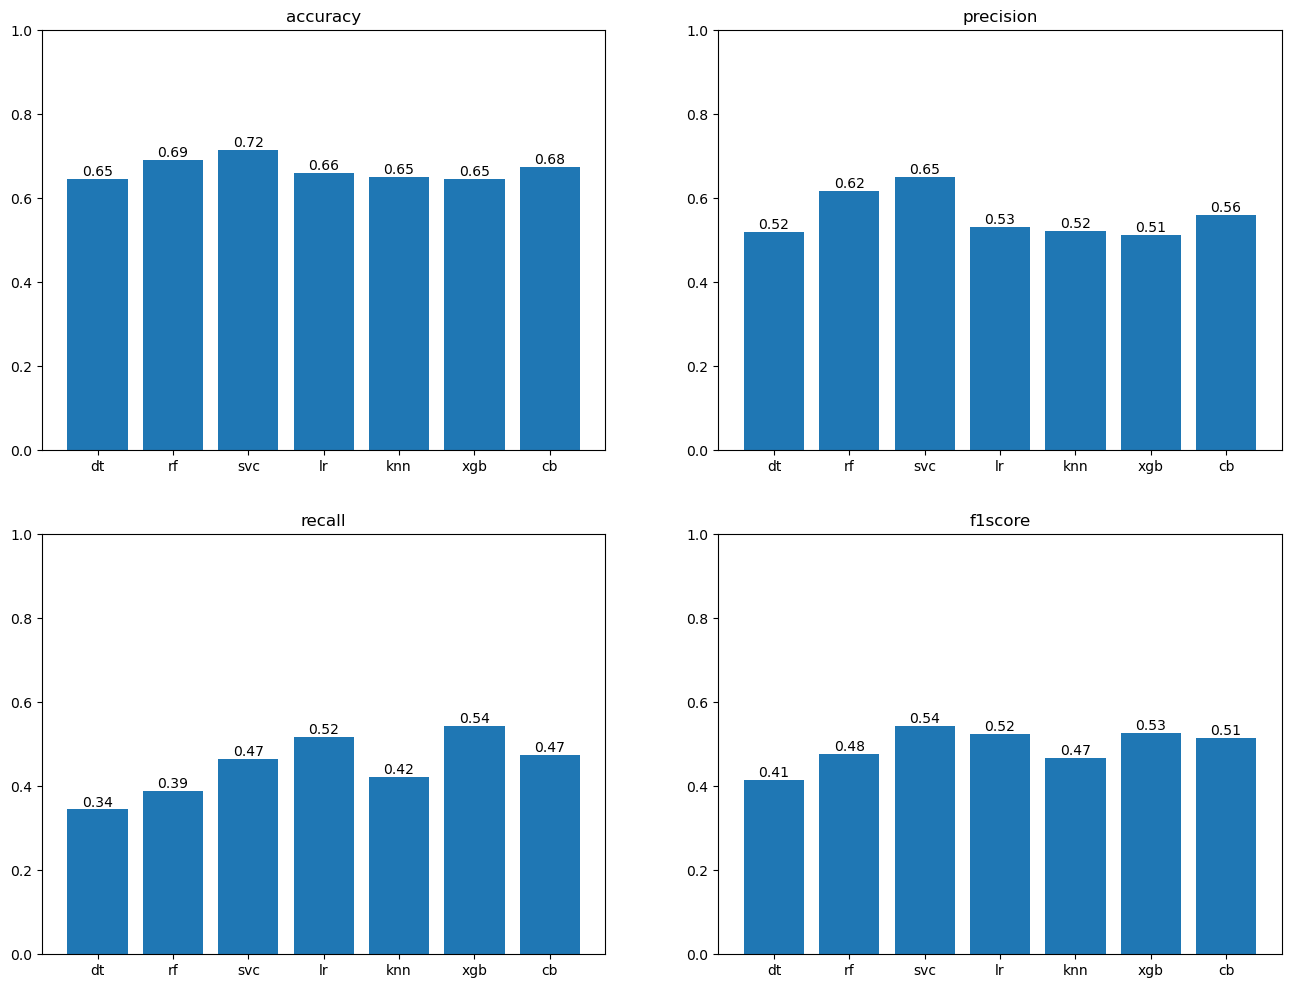

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

ax = ax.flatten()

score = [accuracy, precision, recall, f1score]
score_name = ['accuracy', 'precision', 'recall', 'f1score']

for i in range(len(ax)):
    ax[i].bar(models_name, score[i])
    ax[i].set_title(score_name[i])
    ax[i].set_ylim([0, 1])
    for j, v in enumerate(score[i]):
        ax[i].text(j, v, str(round(v, 2)), ha='center', va='bottom')